## A notebook for EFTflag = 4, the full mapping EFT

#### Here we just show how to set the parameters of this flag, the details of description please see them in 0&1 exapmle and the markdown file in find_your_model file.

In [ ]:
# initial imports:
import sys, platform, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

camb_installation_path = './../' 
camb_path = os.path.realpath(os.path.join(os.getcwd(),camb_installation_path))
sys.path.insert(0,camb_path)
print('camb path:', camb_path)
import camb
# camb.set_feedback_level(1)
from camb import model, initialpower

In [27]:
# Turn off all the stability checks firstly
stability_flag ={
                'EFT_ghost_math_stability'   : False,
                'EFT_mass_math_stability'    : False,
                'EFT_ghost_stability'        : True,
                'EFT_gradient_stability'     : True,
                'EFT_mass_stability'         : False,
                'EFT_additional_priors'      : False,
                }
# Still use the GR case to compare
GR_params = {'EFTflag':0
            }
z = np.linspace(0,4,100)

### CHOOSE EFT MODEL: 
#### EFTflag = 4 -> FullMappingEFT, Use a theory by specifying itand mapping it to the EFT framework
There are seven flags under FullMappingEFT, the flag name is **FullMappingEFTmodel**.
- FullMappingEFTmodel = 1: Horava
- FullMappingEFTmodel = 2: ADE
- FullMappingEFTmodel = 3: K-mouflage
- FullMappingEFTmodel = 4: Quintessence
- FullMappingEFTmodel = 5: Beyond Horndeski
- FullMappingEFTmodel = 6: Scaling Cubic Galileon

### 1. Horava

In [28]:
# Now we can set the parameters for the Horava gravity model
HRV_params = {'EFTflag':4,
                 'FullMappingEFTmodel':1,
                 'Horava_eta':1e-5, 'Horava_lambda':1e-3, 'Horava_xi' :1e-5,           
                 }
HRV_params.update(stability_flag)
HRV_params['EFT_ghost_stability'] = False  # Turn off the ghost stability for Horava gravity
HRV_params['EFT_gradient_stability'] = False # Turn off the gradient stability for Horava gravity

In [29]:
model_key = ['GR', 'HRV'] 
model_par = [GR_params, HRV_params] # list of dictionaries with the parameters
Model = dict(zip(model_key,model_par))    # dictionary with the models, be careful for differring from camb.model

#### See how many extra parameters you have, and how they are called and their values:

In [30]:
for key in Model:
    print('Model:', key)
    pars= camb.set_params(H0=67.3, **Model[key])
    if key == 'GR':
        continue
    print(pars.EFTCAMB.param_names())
    print(pars.EFTCAMB.param_labels())
    print(pars.EFTCAMB.param_values())

Model: GR
Model: HRV
['Horava_eta', 'Horava_lambda', 'Horava_xi']
['\\eta_{\\rm Ho\\v rava}', '\\lambda_{\\rm Ho\\v rava}', '\\xi_{\\rm Ho\\v rava}']
[1e-05, 0.001, 1e-05]


#### Move to get some results

In [31]:
for key in Model:
    print('Model:', key)
    pars = camb.set_params(H0=67.3, **Model[key])
    bk_results = camb.get_background(pars)
    print('The age of the universe for {}: '.format(key), bk_results.get_derived_params()['age'])
    print('CosmoMC theta_MC parameter for {}:'.format(key), bk_results.cosmomc_theta(), '\n')

Model: GR
The age of the universe for GR:  13.812291011516189
CosmoMC theta_MC parameter for GR: 0.01041714773853369 

Model: HRV
The age of the universe for HRV:  13.818104826726259
CosmoMC theta_MC parameter for HRV: 0.010418653674065827 



In [32]:
HRV_params.update({'EFT_ghost_stability': False
                   ,'EFT_gradient_stability': False
                 })

In [33]:
for key in Model:
    print('Model:', key)
    pars = camb.set_params(H0=67.3, **Model[key])
    bk_results = camb.get_background(pars)
    print('The age of the universe for {}: '.format(key), bk_results.get_derived_params()['age'])
    print('CosmoMC theta_MC parameter for {}:'.format(key), bk_results.cosmomc_theta(), '\n')

Model: GR
The age of the universe for GR:  13.812291011516189
CosmoMC theta_MC parameter for GR: 0.01041714773853369 

Model: HRV
The age of the universe for HRV:  13.818104826726259
CosmoMC theta_MC parameter for HRV: 0.010418653674065827 



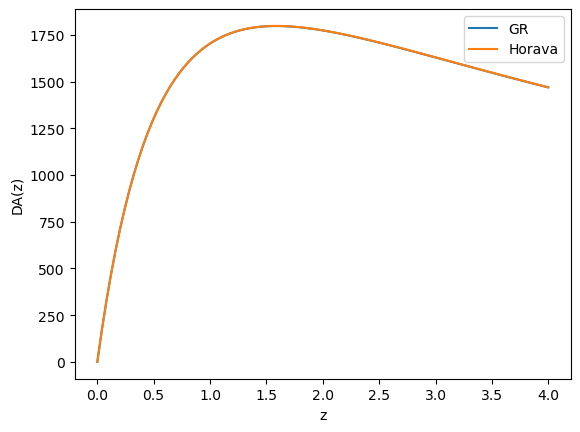

In [34]:
labs = []
for key in Model:
# We set here camb default param values (Planck 2018 cosmology) through the CAMBparams() method     
# The cosmological model can be changed with CAMB dedicated function
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    if key == 'GR':
        labs.append('GR')
    else:
        labs.append(pars.EFTCAMB.model_name()) # store the model names for the model passed to set_cosmology
    DA =results.angular_diameter_distance(z)  # the angular diameter distance
    plt.plot(z,DA,label=key)
plt.xlabel('z')
plt.ylabel('DA(z)')
plt.legend(labs)
plt.show()

#### Second, give the CMB Cls.

In [35]:
toplot_totCL = []
for key in Model:
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    Cls =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    
    totCL=Cls['total']
    # unlensedCL=Cls['unlensed_scalar']
    toplot_totCL.append(totCL)
    

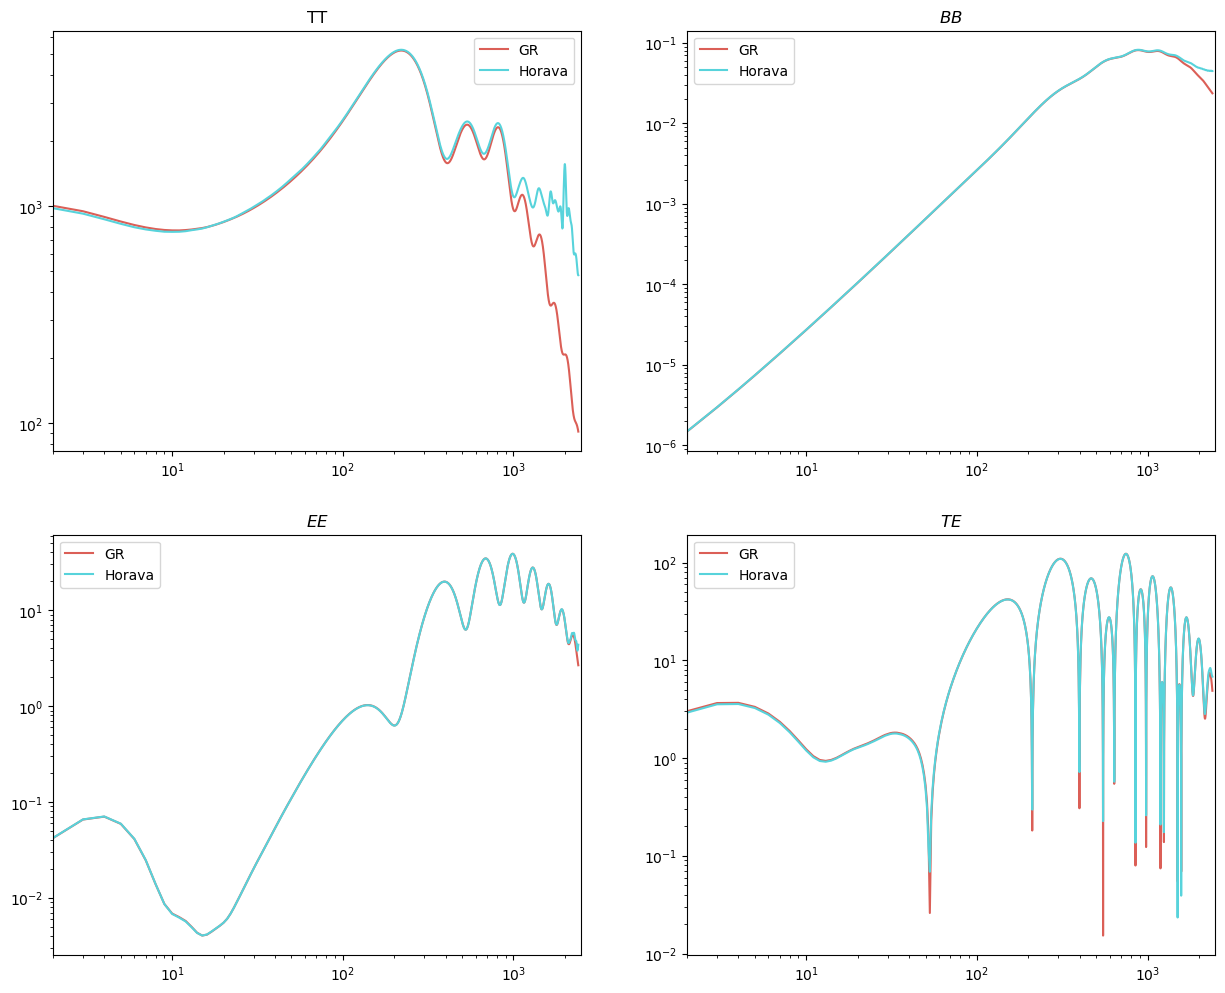

In [36]:
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results)

fig, ax = plt.subplots(2,2, figsize = (15,12))
color = sns.hls_palette(len(Model))

for CLS,c,lab in zip(toplot_totCL,color,labs):
    
    ls = np.arange(CLS.shape[0])
    ax[0,0].loglog(ls,CLS[:,0], color=c,label=lab)
    ax[0,1].loglog(ls,CLS[:,2], color=c,label=lab)
    ax[1,0].loglog(ls,CLS[:,1], color=c,label=lab)
    ax[1,1].loglog(ls,abs(CLS[:,3]), color=c,label=lab)
    ax[0,0].set_title('TT')
    ax[0,1].set_title(r'$BB$')
    ax[1,0].set_title(r'$EE$')
    ax[1,1].set_title(r'$TE$');

ax[1,0].legend()
ax[0,0].legend()
ax[0,1].legend()
ax[1,1].legend()

for ax in ax.reshape(-1): ax.set_xlim([2,2500]);

### 2. ADE

In [37]:
# Full mapping Acoustic Dark Energy
ADE_params = {'EFTflag':4,
                 'FullMappingEFTmodel':2,
                'cs2':2, 'Log_ac':-3, 'f_ac':0.07, 'p':1.5, 'wf':1.2,           
                 }
ADE_params.update(stability_flag)

model_key = ['GR', 'ADE'] 
model_par = [GR_params, ADE_params] 
Model = dict(zip(model_key,model_par))

for key in Model:
    print('Model:', key)
    pars= camb.set_params(H0=67.3, **Model[key])
    if key == 'GR':
        continue
    print(pars.EFTCAMB.param_names())
    print(pars.EFTCAMB.param_labels())
    print(pars.EFTCAMB.param_values())

Model: GR
Model: ADE
['cs2', 'Log_ac', 'f_ac', 'p', 'wf']
['c_s^2', '\\\\log(a_c)', 'f(a_c)', 'p', 'w_f']
[2.0, -3.0, 0.07, 1.5, 1.2]


Model: GR
The age of the universe for GR:  13.812291011516189
CosmoMC theta_MC parameter for GR: 0.01041714773853369 

Model: ADE
***************************************************************
 EFTCAMB ADE background solver

The age of the universe for ADE:  13.81211395544226
CosmoMC theta_MC parameter for ADE: 0.0103497906622625 

***************************************************************
 EFTCAMB ADE background solver



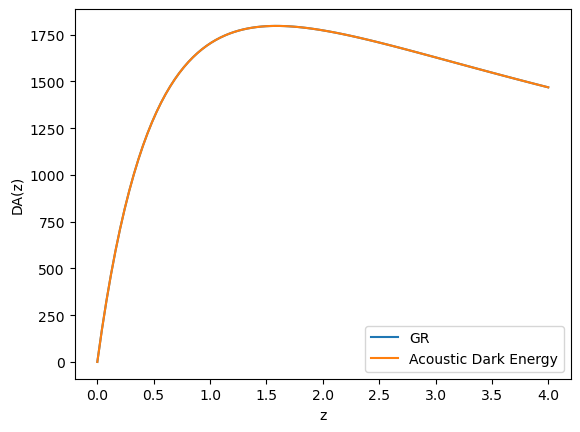

In [38]:
for key in Model:
    print('Model:', key)
    pars = camb.set_params(H0=67.3, **Model[key])
    bk_results = camb.get_background(pars)
    print('The age of the universe for {}: '.format(key), bk_results.get_derived_params()['age'])
    print('CosmoMC theta_MC parameter for {}:'.format(key), bk_results.cosmomc_theta(), '\n')

labs = []
for key in Model:
# We set here camb default param values (Planck 2018 cosmology) through the CAMBparams() method     
# The cosmological model can be changed with CAMB dedicated function
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    if key == 'GR':
        labs.append('GR')
    else:
        labs.append(pars.EFTCAMB.model_name()) # store the model names for the model passed to set_cosmology
    DA =results.angular_diameter_distance(z)  # the angular diameter distance
    plt.plot(z,DA,label=key)
plt.xlabel('z')
plt.ylabel('DA(z)')
plt.legend(labs)
plt.show()

***************************************************************
 EFTCAMB ADE background solver

***************************************************************
 EFTCAMB ADE background solver



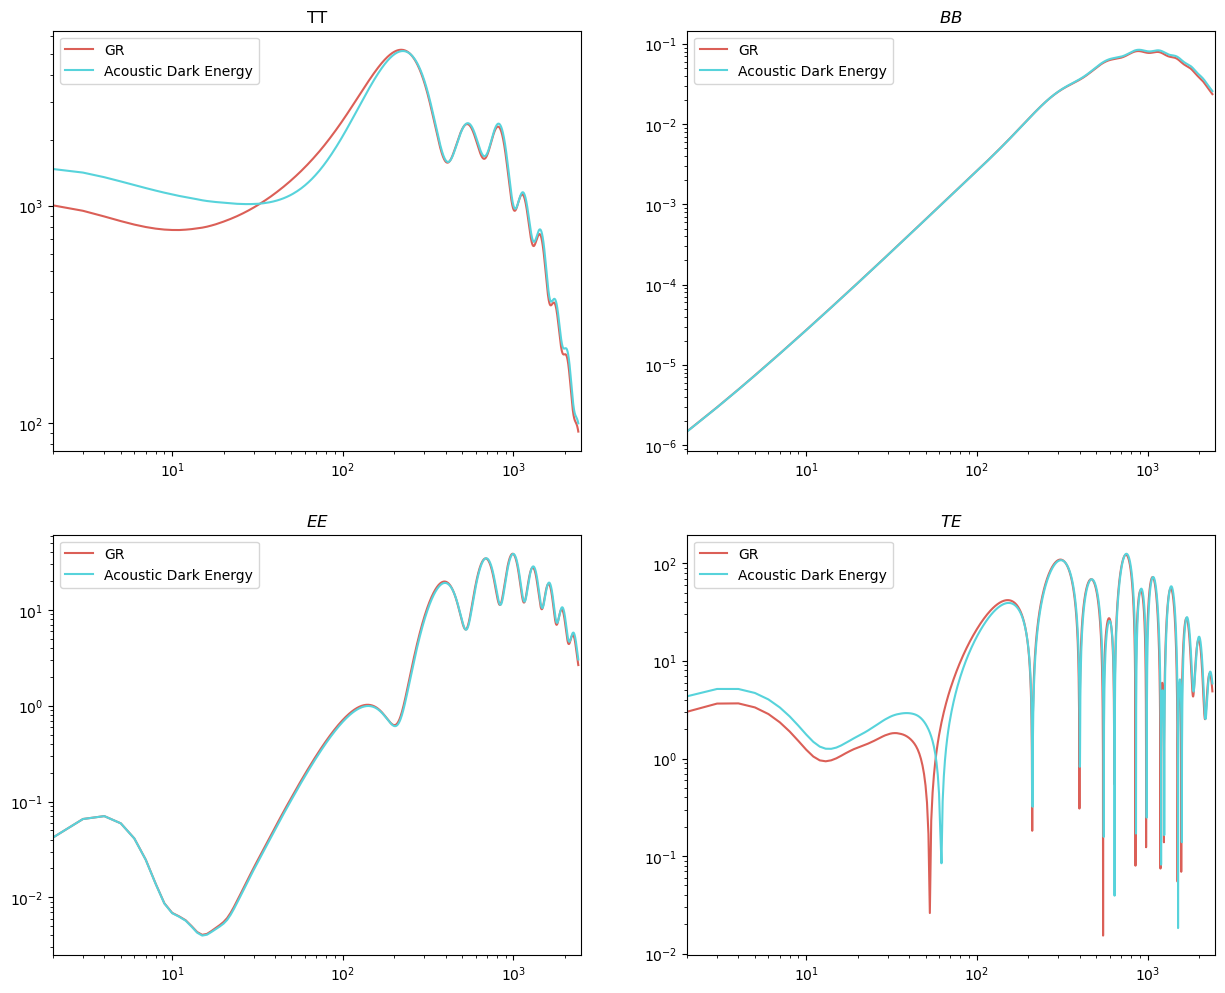

In [39]:
toplot_totCL = []
for key in Model:
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    Cls =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    
    totCL=Cls['total']
    # unlensedCL=Cls['unlensed_scalar']
    toplot_totCL.append(totCL)

#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results)

fig, ax = plt.subplots(2,2, figsize = (15,12))
color = sns.hls_palette(len(Model))

for CLS,c,lab in zip(toplot_totCL,color,labs):
    
    ls = np.arange(CLS.shape[0])
    ax[0,0].loglog(ls,CLS[:,0], color=c,label=lab)
    ax[0,1].loglog(ls,CLS[:,2], color=c,label=lab)
    ax[1,0].loglog(ls,CLS[:,1], color=c,label=lab)
    ax[1,1].loglog(ls,abs(CLS[:,3]), color=c,label=lab)
    ax[0,0].set_title('TT')
    ax[0,1].set_title(r'$BB$')
    ax[1,0].set_title(r'$EE$')
    ax[1,1].set_title(r'$TE$');

ax[1,0].legend()
ax[0,0].legend()
ax[0,1].legend()
ax[1,1].legend()

for ax in ax.reshape(-1): ax.set_xlim([2,2500]);

### 3. K-mouflage
Num_Nu_Massive=0

In [40]:
# Full mapping K-mouflage
KM_params = {'EFTflag':4,
                 'FullMappingEFTmodel':3,
                 'alphaU':0.2, 'gammaU':1, 'm':3.0, 'eps2_0':-0.01, 'gammaA':0.2,           
                 }
KM_params.update(stability_flag)
KM_params.update({'num_nu_massive':0,'nu_mass_numbers':[0,0,0]})

model_key = ['GR', 'KM'] 
model_par = [GR_params, KM_params] 
Model = dict(zip(model_key,model_par))

for key in Model:
    print('Model:', key)
    pars= camb.set_params(H0=67.3, **Model[key])
    if key == 'GR':
        continue
    print(pars.EFTCAMB.param_names())
    print(pars.EFTCAMB.param_labels())
    print(pars.EFTCAMB.param_values())

Model: GR
Model: KM
['alphaU', 'gammaU', 'm', 'eps2_0', 'gammaA']
['\\alpha_{U}', '\\gamma_{U}', 'm', '\\epsilon_{2,0}', '\\gamma_{A}']
[0.2, 1.0, 3.0, -0.01, 0.2]


In [41]:
pars= camb.set_params(H0=67.3, **Model['KM'])
pars.EFTCAMB.feedback()

***************************************************************
     ______________________   __  ______  
    / __/ __/_  __/ ___/ _ | /  |/  / _ ) 
   / _// _/  / / / /__/ __ |/ /|_/ / _  | 
  /___/_/   /_/  \___/_/ |_/_/  /_/____/   V3.1 Sep25
  
***************************************************************

 EFTCAMB settings:
  EFTCAMB_feedback_level      =           1
  EFTCAMB_back_turn_on        =   1.0000000000000000E-008
  EFTCAMB_pert_turn_on        =   1.0000000000000000E-002
  EFTCAMB_GR_threshold        =   1.0000000000000000E-008
  EFTCAMB_stability_time      =   1.0000000000000000E-010
  EFTCAMB_stability_threshold =   0.0000000000000000     
  EFTCAMB_effective_w0wa      = F

 EFTCAMB stability flags:
  Math ghost stability   =  F
  Math mass stability    =  F
  Ghost stability        =  T
  Gradient stability     =  T
  Mass stability         =  F
  Mass stability rate    =  0.10000E+02
  Additional priors      =  F
  Positivity bounds      =  F
  Minkowski limit    

Model: GR
The age of the universe for GR:  13.812291011516189
CosmoMC theta_MC parameter for GR: 0.01041714773853369 

Model: KM
***************************************************************
 EFTCAMB Kmouflage background solver

The age of the universe for KM:  13.826749684701305
CosmoMC theta_MC parameter for KM: 0.010407144055547867 

***************************************************************
 EFTCAMB Kmouflage background solver



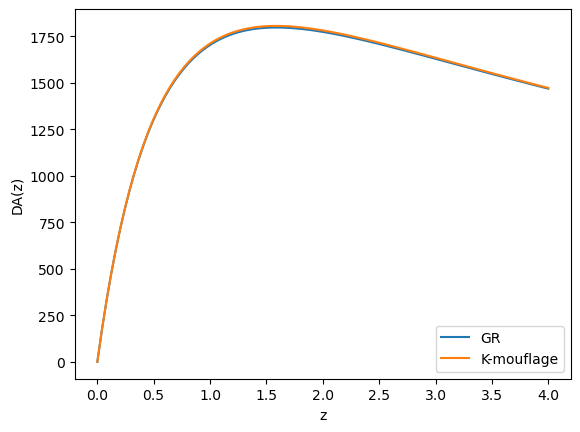

In [42]:
for key in Model:
    print('Model:', key)
    pars = camb.set_params(H0=67.3, **Model[key])
    bk_results = camb.get_background(pars)
    print('The age of the universe for {}: '.format(key), bk_results.get_derived_params()['age'])
    print('CosmoMC theta_MC parameter for {}:'.format(key), bk_results.cosmomc_theta(), '\n')

labs = []
for key in Model:
# We set here camb default param values (Planck 2018 cosmology) through the CAMBparams() method     
# The cosmological model can be changed with CAMB dedicated function
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    if key == 'GR':
        labs.append('GR')
    else:
        labs.append(pars.EFTCAMB.model_name()) # store the model names for the model passed to set_cosmology
    DA =results.angular_diameter_distance(z)  # the angular diameter distance
    plt.plot(z,DA,label=key)
plt.xlabel('z')
plt.ylabel('DA(z)')
plt.legend(labs)
plt.show()

### 4. Quintessence

In [43]:
# Full mapping K-mouflage
Quint_params = {'EFTflag':4,
                'FullMappingEFTmodel':4,
                #  'drag_initial_conditions' : 0,  ?????????????????
                'potential_model': 2,
                'phidot_ini':1, 'V0':1, 'p':1.5        
                 }
Quint_params.update(stability_flag)

model_key = ['GR', 'Quintessence'] 
model_par = [GR_params, Quint_params] 
Model = dict(zip(model_key,model_par))

for key in Model:
    print('Model:', key)
    pars= camb.set_params(H0=67.3, **Model[key])
    if key == 'GR':
        continue
    print(pars.EFTCAMB.param_names())
    print(pars.EFTCAMB.param_labels())
    print(pars.EFTCAMB.param_values())

Model: GR
Model: Quintessence
['phidot_ini', 'V0', 'p']
['\\dot{\\phi}_{\\rm ini}', 'V_0', 'p']
[1.0, 1.0, 1.5]


Model: GR
The age of the universe for GR:  13.812291011516189
CosmoMC theta_MC parameter for GR: 0.01041714773853369 

Model: Quintessence
 a, rho_tot, H2, phi, phi_prime, V, V0   9.9999999999999820E-009   1.3961715810106865E+021   5.5846863240427458E+020  0.25768709927343747        236.31940936035545        1.3548101207546601E-008   1.0357129753582271E-007
 a, rho_tot, H2, phi, phi_prime, V, V0   1.0169951038720666E-008   1.3051595211219248E+021   5.1917997225136620E+020  0.27442140065355441        228.48709094270416        1.4889029214873365E-008   1.0357129753582271E-007
 a, rho_tot, H2, phi, phi_prime, V, V0   1.0342790412997535E-008   1.2200802648087908E+021   4.8272975906650240E+020  0.29092104767270327        220.91435852316457        1.6251824785013723E-008   1.0357129753582271E-007
 a, rho_tot, H2, phi, phi_prime, V, V0   1.0518567210393459E-008   1.1405470697868915E+021   4.4890629135763558E+020  0.30718809021734766        213.59260866932794        1.7633802730189534E-008   1

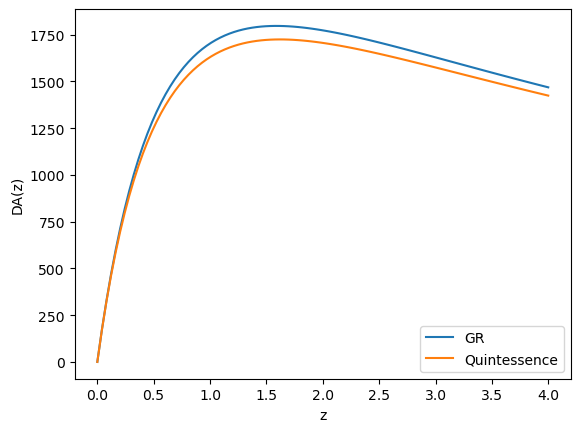

In [44]:
for key in Model:
    print('Model:', key)
    pars = camb.set_params(H0=67.3, **Model[key])
    bk_results = camb.get_background(pars)
    print('The age of the universe for {}: '.format(key), bk_results.get_derived_params()['age'])
    print('CosmoMC theta_MC parameter for {}:'.format(key), bk_results.cosmomc_theta(), '\n')

labs = []
for key in Model:
# We set here camb default param values (Planck 2018 cosmology) through the CAMBparams() method     
# The cosmological model can be changed with CAMB dedicated function
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    if key == 'GR':
        labs.append('GR')
    else:
        labs.append(pars.EFTCAMB.model_name()) # store the model names for the model passed to set_cosmology
    DA =results.angular_diameter_distance(z)  # the angular diameter distance
    plt.plot(z,DA,label=key)
plt.xlabel('z')
plt.ylabel('DA(z)')
plt.legend(labs)
plt.show()

### 5. Beyond Horndeski

In [45]:
# Full mapping Beyond Horndeski
BH_params = {'EFTflag':4,
                'FullMappingEFTmodel':5,
                'Beyond_Horndeski_x10':-1.3, 'Beyond_Horndeski_x30':0.4, 'Beyond_Horndeski_x40':2.0    
                 }
BH_params.update(stability_flag)

model_key = ['GR', 'BeyondHorndeski'] 
model_par = [GR_params, BH_params] 
Model = dict(zip(model_key,model_par))

for key in Model:
    print('Model:', key)
    pars= camb.set_params(H0=67.3, **Model[key])
    if key == 'GR':
        continue
    print(pars.EFTCAMB.param_names())
    print(pars.EFTCAMB.param_labels())
    print(pars.EFTCAMB.param_values())

Model: GR
Model: BeyondHorndeski
['Beyond_Horndeski_x10', 'Beyond_Horndeski_x30', 'Beyond_Horndeski_x40']
['x_1^0', 'x_3^0', 'x_4^0']
[-1.3, 0.4, 2.0]


Model: GR
The age of the universe for GR:  13.812291011516189
CosmoMC theta_MC parameter for GR: 0.01041714773853369 

Model: BeyondHorndeski
***************************************************************
 EFTCAMB beyond Horndeski background solver

 ---------------------------------------------------
Bisection algorithm ended successfully, with tollerance    0.693E-07  and steps   18

x2 initial    =         0.765E-15

 ---------------------------------------------------
today values
x1 = -1.36758803
x2 = 2.04357806
x3 = 0.01041511
x4 = 0.00000013
 ---------------------------------------------------
relative error on H_0       -0.7587E-07
relative error on OmegaM_0   0.1517E-06
OmegaRad_0 = 0.000080
OmegaDE_0  = 0.686405
OmegaM_0   = 0.313515
 ---------------------------------------------------
The age of the universe for BeyondHorndeski:  17.252663694652433
CosmoMC theta_MC parameter for BeyondHorndeski: 0.009438676109958247 

********************************************************

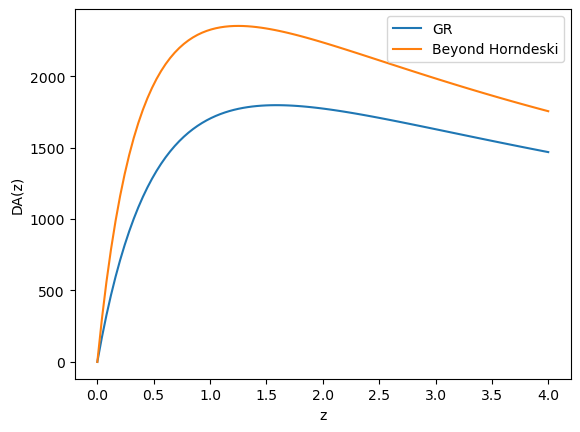

In [46]:
for key in Model:
    print('Model:', key)
    pars = camb.set_params(H0=67.3, **Model[key])
    bk_results = camb.get_background(pars)
    print('The age of the universe for {}: '.format(key), bk_results.get_derived_params()['age'])
    print('CosmoMC theta_MC parameter for {}:'.format(key), bk_results.cosmomc_theta(), '\n')

labs = []
for key in Model:
# We set here camb default param values (Planck 2018 cosmology) through the CAMBparams() method     
# The cosmological model can be changed with CAMB dedicated function
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    if key == 'GR':
        labs.append('GR')
    else:
        labs.append(pars.EFTCAMB.model_name()) # store the model names for the model passed to set_cosmology
    DA =results.angular_diameter_distance(z)  # the angular diameter distance
    plt.plot(z,DA,label=key)
plt.xlabel('z')
plt.ylabel('DA(z)')
plt.legend(labs)
plt.show()

### 6. Scaling Cubic Galileon

In [47]:
# Full mapping Beyond Horndeski
SCG_params = {'EFTflag':4,
                'FullMappingEFTmodel':6,
                'Scaling_Cubic_A':-0.2, 'Scaling_Cubic_beta1':99, 'Scaling_Cubic_beta2':0.8, 'Scaling_Cubic_lambda':155,
                 }
SCG_params.update(stability_flag)

model_key = ['GR', 'SCG'] 
model_par = [GR_params, SCG_params] 
Model = dict(zip(model_key,model_par))

for key in Model:
    print('Model:', key)
    pars= camb.set_params(H0=67.3, **Model[key])
    if key == 'GR':
        continue
    print(pars.EFTCAMB.param_names())
    print(pars.EFTCAMB.param_labels())
    print(pars.EFTCAMB.param_values())

Model: GR
Model: SCG
['Scaling_Cubic_A', 'Scaling_Cubic_beta1', 'Scaling_Cubic_beta2', 'Scaling_Cubic_lambda']
['A', 'beta_1', 'beta_2', 'lambda']
[-0.2, 99.0, 0.8, 155.0]


Model: GR
The age of the universe for GR:  13.812291011516189
CosmoMC theta_MC parameter for GR: 0.01041714773853369 

Model: SCG
***************************************************************
 EFTCAMB Scaling Cubic Galileon v2. background solver

 ---------------------------------------------------
Bisection algorithm ended successfully, with tollerance   -0.184E-06  and steps   16

y2 initial    =         0.477E-08

 ---------------------------------------------------
today values
x1 =     0.01
y1 =     0.03
y2 =     0.83
 ---------------------------------------------------
relative error on H_0        0.2018E-06
relative error on OmegaM_0  -0.4037E-06
OmegaRad_0 = 0.000080
OmegaDE_0  = 0.686405
OmegaM_0   = 0.313515
 ---------------------------------------------------
The age of the universe for SCG:  13.787037645824082
CosmoMC theta_MC parameter for SCG: 0.01041561130394142 

***************************************************************
 EFTCAMB Scaling Cubic Galileon v2. backgr

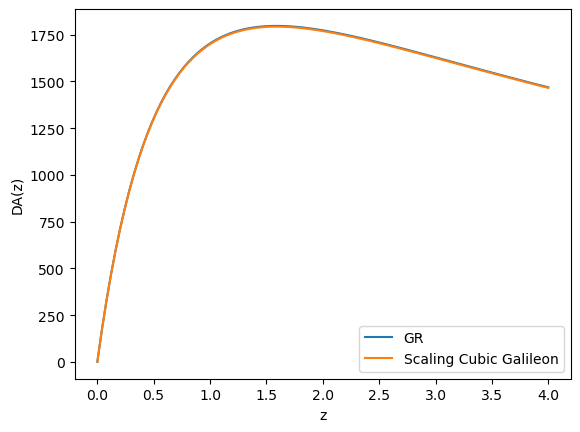

In [48]:
for key in Model:
    print('Model:', key)
    pars = camb.set_params(H0=67.3, **Model[key])
    bk_results = camb.get_background(pars)
    print('The age of the universe for {}: '.format(key), bk_results.get_derived_params()['age'])
    print('CosmoMC theta_MC parameter for {}:'.format(key), bk_results.cosmomc_theta(), '\n')

labs = []
for key in Model:
# We set here camb default param values (Planck 2018 cosmology) through the CAMBparams() method     
# The cosmological model can be changed with CAMB dedicated function
    pars = camb.set_params(H0=67.3, **Model[key]) # H0 (or theta) must be set explicitely here
    results = camb.get_results(pars)
    if key == 'GR':
        labs.append('GR')
    else:
        labs.append(pars.EFTCAMB.model_name()) # store the model names for the model passed to set_cosmology
    DA =results.angular_diameter_distance(z)  # the angular diameter distance
    plt.plot(z,DA,label=key)
plt.xlabel('z')
plt.ylabel('DA(z)')
plt.legend(labs)
plt.show()